# Mount GDrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/NewsStocksData
!ls

# Imports

In [ ]:
import pandas as pd
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import math

# Random Forest

In [ ]:
  df = pd.read_excel('new.xlsx')

In [ ]:
df.head()


,Unnamed: 0,Date,Open,High,Low,Adj Close**,Volume,Adj Close Stationary
0,1257,2018-05-01,24117.29,24117.29,23808.19,24099.05,380070000,NaN
1,1256,2018-05-02,24097.63,24185.52,23886.30,23924.98,385350000,-0.561669
2,1255,2018-05-03,23836.23,23996.15,23531.31,23930.15,389240000,0.016711
3,1254,2018-05-04,23865.22,24333.35,23778.87,24262.51,329480000,1.070547
4,1253,2018-05-07,24317.66,24479.45,24263.42,24357.32,307670000,0.304041


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df = df.drop('Adj Close Stationary', axis=1)

In [ ]:
df['Year'] = df['Date'].apply(lambda time: time.year)

df['Month'] = df['Date'].apply(lambda time: time.month)

df['Day'] = df['Date'].apply(lambda time: time.day)

In [ ]:
df.head()

,Date,Open,High,Low,Adj Close**,Volume,Year,Month,Day
0,2018-05-01,24117.29,24117.29,23808.19,24099.05,380070000,2018,5,1
1,2018-05-02,24097.63,24185.52,23886.30,23924.98,385350000,2018,5,2
2,2018-05-03,23836.23,23996.15,23531.31,23930.15,389240000,2018,5,3
3,2018-05-04,23865.22,24333.35,23778.87,24262.51,329480000,2018,5,4
4,2018-05-07,24317.66,24479.45,24263.42,24357.32,307670000,2018,5,7


In [ ]:
X = df.drop('Adj Close**', axis=1)
y = df['Adj Close**']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
date_all = X['Date']
date_test = X_test['Date']
X_train.drop('Date', axis=1, inplace=True)
X_test.drop('Date', axis=1, inplace=True)

In [ ]:
param_grid = {
    'max_depth': [5,10,20],
    'max_features' : [2,4,7],
    'n_estimators': [20,50,100]}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
param_grid=param_grid,cv=KFold(n_splits=5, shuffle=True, random_state=1))


grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)


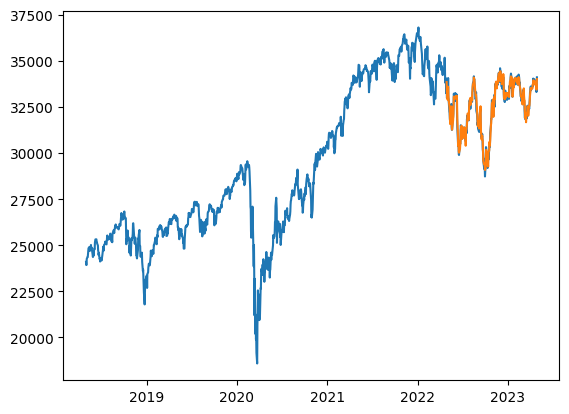

In [ ]:
plt.plot(date_all, y)
plt.plot(date_test, y_pred)
plt.show()

In [ ]:
mean_squared_error(y_test, y_pred)
math.sqrt(mean_squared_error(y_test, y_pred))

212.7037823329203

# Decision Tree


In [ ]:
param_grid = {
    'max_depth': [5, 10, 20],
    'max_features': [2, 4, 7]
}
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=KFold(n_splits=5, shuffle=True, random_state=1))

grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

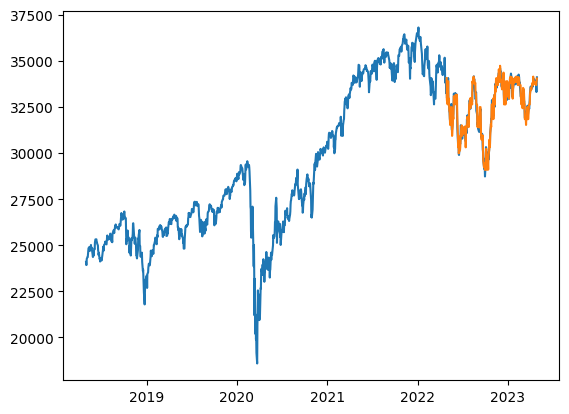

In [ ]:
plt.plot(date_all, y)
plt.plot(date_test, y_pred)
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred)
math.sqrt(mean_squared_error(y_test, y_pred))

265.12848826140066